In [1]:
import os
import argparse
from mindspore import context

parser = argparse.ArgumentParser(description='MindSpore LeNet Example')
parser.add_argument('--device_target', type=str, default="Ascend", choices=['Ascend', 'GPU', 'CPU'])

args = parser.parse_known_args()[0]
context.set_context(mode=context.GRAPH_MODE, device_target=args.device_target)

In [77]:
network = googlenet.GoogleNet(2)

In [4]:
import mindspore.dataset as ds

In [82]:
import mindspore.dataset as ds
import mindspore.dataset.transforms.c_transforms as C
import mindspore.dataset.vision.c_transforms as CV
from mindspore import dtype as mstype

def create_dataset(data_path, batch_size=32, repeat_size=1,
                   num_parallel_workers=1):
    # Define the dataset.
    dataset = ds.ImageFolderDataset(dataset_dir = data_path, class_indexing = {"Covid": 1, "Non_Covid":0})
    decode_op = CV.Decode()
    resize_height, resize_width = 224, 224
    resize_op = CV.Resize((resize_height, resize_width))
    type_cast_op = C.TypeCast(mstype.float32)
    dataset = dataset.map(operations=decode_op, input_columns="image", num_parallel_workers=num_parallel_workers)
    dataset = dataset.map(operations=resize_op, input_columns="image", num_parallel_workers=num_parallel_workers)
    dataset = dataset.map(operations=type_cast_op, input_columns="image", num_parallel_workers=num_parallel_workers)
    buffer_size = 10
    dataset = dataset.shuffle(buffer_size=buffer_size)
    dataset = dataset.batch(batch_size, drop_remainder=True)

    return dataset


ds = create_dataset(data_path="/home/Hachathon_Team_7/Challenge/datasets/train/")

for data in ds:
    print(data)

[Tensor(shape=[32, 224, 224, 3], dtype=Float32, value=
[[[[ 2.51000000e+02,  2.51000000e+02,  2.51000000e+02],
   [ 2.51000000e+02,  2.51000000e+02,  2.51000000e+02],
   [ 2.55000000e+02,  2.55000000e+02,  2.55000000e+02],
   ...
   [ 2.55000000e+02,  2.55000000e+02,  2.55000000e+02],
   [ 2.55000000e+02,  2.55000000e+02,  2.55000000e+02],
   [ 2.49000000e+02,  2.49000000e+02,  2.49000000e+02]],
  [[ 2.53000000e+02,  2.53000000e+02,  2.53000000e+02],
   [ 2.53000000e+02,  2.53000000e+02,  2.53000000e+02],
   [ 2.55000000e+02,  2.55000000e+02,  2.55000000e+02],
   ...
   [ 2.53000000e+02,  2.53000000e+02,  2.53000000e+02],
   [ 2.55000000e+02,  2.55000000e+02,  2.55000000e+02],
   [ 2.50000000e+02,  2.50000000e+02,  2.50000000e+02]],
  [[ 2.46000000e+02,  2.46000000e+02,  2.46000000e+02],
   [ 2.46000000e+02,  2.46000000e+02,  2.46000000e+02],
   [ 2.43000000e+02,  2.43000000e+02,  2.43000000e+02],
   ...
   [ 2.49000000e+02,  2.49000000e+02,  2.49000000e+02],
   [ 2.55000000e+02,  2.55

RuntimeError: Thread ID 281468970447344 Unexpected error. Fail to find size of file, check path: /home/Hachathon_Team_7/Challenge/datasets/train//Covid/.ipynb_checkpoints
Line of code : 265
File         : /home/jenkins/agent-working-dir/workspace/Compile_Ascend_ARM_Ubuntu/mindspore/mindspore/ccsrc/minddata/dataset/core/tensor.cc


In [79]:
# Define the loss function.
googlenet_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
# Define the optimizer.
googlenet_opt = nn.Momentum(network.trainable_params(), learning_rate=0.01, momentum=0.9)

In [80]:
# Import the library required for model training.
from mindspore.nn import Accuracy
from mindspore.train.callback import LossMonitor
from mindspore import Model

train_epoch = 1
dataset_size=1

train = ds
model = Model(network, googlenet_loss, googlenet_opt, metrics={"Accuracy": Accuracy()})

In [81]:
model.train(train_epoch,train)

RuntimeError: The Dataset cannot be bound to different models, please create a new dataset.

In [ ]:
train_epoch = 1
data_path = "/home/Hachathon_Team_7/Challenge/datasets/train/"
dataset_size = 1
model = Model(net, net_loss, net_opt, metrics={"Accuracy": Accuracy()})
train_net(args, model, train_epoch, data_path, dataset_size, ckpoint, False)

In [74]:
from googlenet.src import googlenet

In [76]:
network = googlenet.GoogleNet(2)

In [8]:
test = ds.ImageFolderDataset(dataset_dir = "/home/Hachathon_Team_7/Challenge/datasets/train/", class_indexing = {"Covid": 1, "Non_Covid":0})

In [22]:
test_ds = create_dataset(data_path="/home/Hachathon_Team_7/Challenge/datasets/train/")

In [73]:
network = resnet50(2)

NameError: name 'resnet50' is not defined

In [40]:
import mindspore.nn as nn
from mindspore.common.initializer import Normal

class LeNet5(nn.Cell):
    """
    Lenet network structure
    """
    def __init__(self, num_class=2, num_channel=1):
        super(LeNet5, self).__init__()
        # Define the required operation.
        self.conv1 = nn.Conv2d(num_channel, 6, 5, pad_mode='valid')
        self.conv2 = nn.Conv2d(6, 16, 5, pad_mode='valid')
        self.fc1 = nn.Dense(16 * 5 * 5, 120, weight_init=Normal(0.02))
        self.fc2 = nn.Dense(120, 84, weight_init=Normal(0.02))
        self.fc3 = nn.Dense(84, num_class, weight_init=Normal(0.02))
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()

    def construct(self, x):
        # Use the defined operation to construct a forward network.
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Instantiate the network.
net = LeNet5()

# Draft

In [7]:
for data in test.create_dict_iterator():
    print("Image shape: {}".format(data['image'].shape), ", Label: {}".format(data['label']))

Image shape: (82192,) , Label: 1
Image shape: (87098,) , Label: 0
Image shape: (86251,) , Label: 1
Image shape: (89663,) , Label: 1
Image shape: (81219,) , Label: 0
Image shape: (91289,) , Label: 1
Image shape: (51704,) , Label: 0
Image shape: (95644,) , Label: 0
Image shape: (79465,) , Label: 1
Image shape: (82256,) , Label: 1
Image shape: (75411,) , Label: 0
Image shape: (63529,) , Label: 1
Image shape: (53352,) , Label: 0
Image shape: (85935,) , Label: 0
Image shape: (97722,) , Label: 1
Image shape: (84517,) , Label: 0
Image shape: (100074,) , Label: 1
Image shape: (101794,) , Label: 0
Image shape: (72111,) , Label: 0
Image shape: (95734,) , Label: 1
Image shape: (87396,) , Label: 0
Image shape: (98066,) , Label: 1
Image shape: (107290,) , Label: 1
Image shape: (73062,) , Label: 0
Image shape: (92780,) , Label: 1
Image shape: (96993,) , Label: 1
Image shape: (110678,) , Label: 1
Image shape: (77968,) , Label: 0
Image shape: (95891,) , Label: 1
Image shape: (77425,) , Label: 1
Image 

RuntimeError: Thread ID 281471797314032 Unexpected error. Fail to find size of file, check path: /home/Hachathon_Team_7/Challenge/datasets/train//Non_Covid/.ipynb_checkpoints
Line of code : 265
File         : /home/jenkins/agent-working-dir/workspace/Compile_Ascend_ARM_Ubuntu/mindspore/mindspore/ccsrc/minddata/dataset/core/tensor.cc


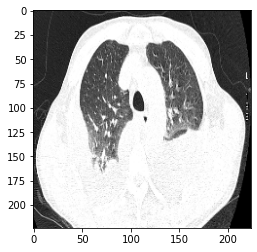

In [143]:
plt.imshow(covid_images[1])

In [163]:
for i, image in enumerate(covid_x_train):
    cv2.imwrite(f'/home/Hachathon_Team_7/Challenge/datasets/train/Covid/image_{i}.png', image)

In [164]:
for i, image in enumerate(noncovid_x_train):
    cv2.imwrite(f'/home/Hachathon_Team_7/Challenge/datasets/train/Non_Covid/image_{i}.png', image)

In [166]:
for i, image in enumerate(covid_x_test):
    cv2.imwrite(f'/home/Hachathon_Team_7/Challenge/datasets/test/Covid/image_{i}.png', image)

In [167]:
for i, image in enumerate(noncovid_x_test):
    cv2.imwrite(f'/home/Hachathon_Team_7/Challenge/datasets/test/Non_Covid/image_{i}.png', image)

In [206]:
dataset = ds.ImageFolderDataset(dataset_dir = "/home/Hachathon_Team_7/Challenge/datasets/train/", class_indexing = {"Covid": 1, "Non_Covid":0})

In [207]:
dataset.get_dataset_size()

545

In [208]:
for data in dataset.create_dict_iterator():
    print("Image shape: {}".format(data['image'].shape), ", Label: {}".format(data['label']))

Image shape: (102298,) , Label: 0
Image shape: (105613,) , Label: 1
Image shape: (81662,) , Label: 1
Image shape: (94945,) , Label: 1
Image shape: (100074,) , Label: 1
Image shape: (97180,) , Label: 0
Image shape: (106843,) , Label: 0
Image shape: (85668,) , Label: 1
Image shape: (97272,) , Label: 1
Image shape: (76668,) , Label: 1
Image shape: (112726,) , Label: 0
Image shape: (64413,) , Label: 1
Image shape: (68430,) , Label: 1
Image shape: (110075,) , Label: 1
Image shape: (102040,) , Label: 0
Image shape: (95314,) , Label: 0
Image shape: (35362,) , Label: 0
Image shape: (99830,) , Label: 0
Image shape: (33144,) , Label: 0
Image shape: (33144,) , Label: 1
Image shape: (80850,) , Label: 0
Image shape: (102237,) , Label: 1
Image shape: (96478,) , Label: 0
Image shape: (100542,) , Label: 1
Image shape: (75284,) , Label: 0
Image shape: (95463,) , Label: 1
Image shape: (92032,) , Label: 1
Image shape: (111362,) , Label: 1
Image shape: (68430,) , Label: 0
Image shape: (63972,) , Label: 0


RuntimeError: Thread ID 281453820629488 Unexpected error. Fail to find size of file, check path: /home/Hachathon_Team_7/Challenge/datasets/train//Non_Covid/.ipynb_checkpoints
Line of code : 265
File         : /home/jenkins/agent-working-dir/workspace/Compile_Ascend_ARM_Ubuntu/mindspore/mindspore/ccsrc/minddata/dataset/core/tensor.cc


In [45]:
# Import the library required for model training.
from mindspore.nn import Accuracy
from mindspore.train.callback import LossMonitor
from mindspore import Model

def train_net(args, model, epoch_size, data_path, repeat_size, ckpoint_cb, sink_mode):
    """Define a training method."""
    # Load the training dataset.
    ds_train = create_dataset(data_path)
    model.train(epoch_size, ds_train, callbacks=[ckpoint_cb, LossMonitor(125)], dataset_sink_mode=sink_mode)

In [43]:
# Define the loss function.
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
# Define the optimizer.
net_opt = nn.Momentum(googlenet.trainable_params(), learning_rate=0.01, momentum=0.9)

In [27]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig
# Set model saving parameters.
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)
# Use model saving parameters.
ckpoint = ModelCheckpoint(prefix="checkpoint_googlenet", config=config_ck)

In [49]:
train_epoch = 1
data_path = "/home/Hachathon_Team_7/Challenge/datasets/train/"
dataset_size = 1
model = Model(net, net_loss, net_opt, metrics={"Accuracy": Accuracy()})
train_net(args, model, train_epoch, data_path, dataset_size, ckpoint, False)

AttributeError: 'BatchDataset' object has no attribute 'ImageFolderDataset'

In [144]:
covid_path = "/home/Hachathon_Team_7/Challenge/datasets/Covid"
noncovid_path = "/home/Hachathon_Team_7/Challenge/datasets/Non_Covid"

In [145]:
import cv2
from glob import glob

In [146]:
# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

In [147]:
covid_images = []
covid_labels = []

for i in range(len(covid_files)):
    image  = cv2.imread(covid_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    covid_images.append(image)
    covid_labels.append('CT_COVID')
    

In [148]:
len(covid_images)

346

In [149]:
noncovid_images = []
noncovid_labels = []

for i in range(len(noncovid_files)):
    image  = cv2.imread(covid_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    noncovid_images.append(image)
    noncovid_labels.append('CT_NonCOVID')

In [150]:
len(noncovid_images)

335

In [95]:
covid_images[10].shape

(224, 224, 3)

In [88]:
import numpy as np
import matplotlib.pyplot as plt

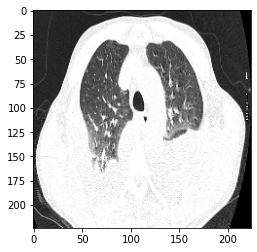

In [151]:
plt.imshow(covid_images[1])

In [96]:
import numpy as np
covid_images = np.array(covid_images)/255
noncovid_images = np.array(noncovid_images)/255

In [97]:
len(noncovid_images)

335

In [98]:
from sklearn.model_selection import train_test_split

In [152]:
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(
    noncovid_images, noncovid_labels, test_size=0.2)

In [153]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

X_train = np.concatenate((noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)

y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

In [106]:
import mindspore.dataset as ds

In [118]:
X_train = X_train.astype("float32")

In [119]:
features, labels = X_train.astype("float32"), y_train
train_ds = (features, labels)

In [120]:
train_dataset = ds.NumpySlicesDataset(train_ds, column_names=["image", "label"], shuffle=False)

In [121]:
X_train.dtype

dtype('float32')

In [101]:
# Define the loss function.
googlenet_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

In [102]:
# Define the optimizer.
googlenet_opt = nn.Momentum(googlenet.trainable_params(), learning_rate=0.01, momentum=0.9)

In [103]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig
# Set model saving parameters.
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)
# Use model saving parameters.
ckpoint = ModelCheckpoint(prefix="checkpoint_googlenet", config=config_ck)

In [104]:
# Import the library required for model training.
from mindspore.nn import Accuracy
from mindspore.train.callback import LossMonitor
from mindspore import Model


In [186]:
train_epoch = 100
dataset_size = 1
model = Model(googlenet, googlenet_loss, googlenet_opt, metrics={"Accuracy": Accuracy()})
model.train(epoch=100, train_dataset = train_dataset)

RuntimeError: Thread ID 281448862835184 Unexpected error. Fail to find size of file, check path: /home/Hachathon_Team_7/Challenge/datasets/train/Non_Covid/.ipynb_checkpoints
Line of code : 265
File         : /home/jenkins/agent-working-dir/workspace/Compile_Ascend_ARM_Ubuntu/mindspore/mindspore/ccsrc/minddata/dataset/core/tensor.cc
